# NYC 311 Service Request Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Import a 311 NYC service request

In [2]:
nyc_311=pd.read_csv('C:/Users/pcc/Desktop/New Folder/311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

#### Perform EDA

In [3]:
nyc_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
nyc_311.shape

(364558, 53)

In [5]:
nyc_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
nyc_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

In [7]:
nyc_311['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [8]:
nyc_311['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

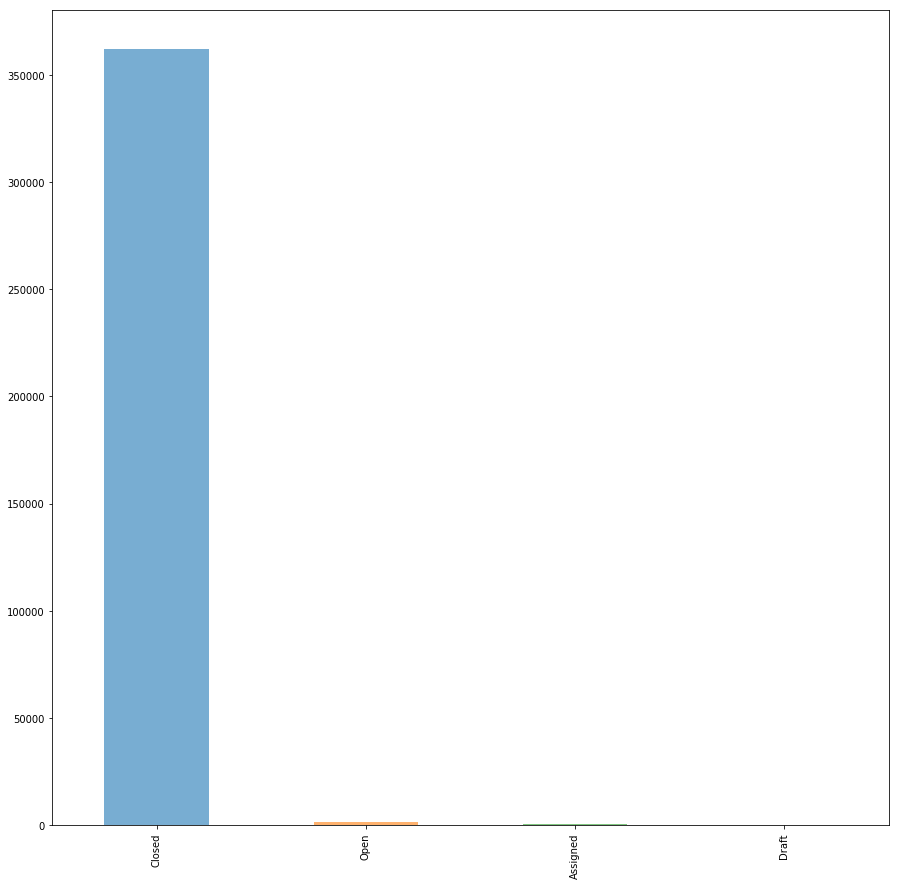

In [9]:
nyc_311['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,15))
plt.show()

In [10]:
nyc_311['City'].value_counts()

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [11]:
nyc_311.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

#### Display the complaint type and city together

In [12]:
complaintTypecity =nyc_311.groupby(['City','Complaint Type']).size()
print(complaintTypecity)

City       Complaint Type           
ARVERNE    Animal Abuse                   46
           Blocked Driveway               50
           Derelict Vehicle               32
           Disorderly Youth                2
           Drinking                        1
           Graffiti                        1
           Homeless Encampment             4
           Illegal Parking                62
           Noise - Commercial              2
           Noise - House of Worship       14
           Noise - Park                    2
           Noise - Street/Sidewalk        29
           Noise - Vehicle                10
           Panhandling                     1
           Traffic                         1
           Urinating in Public             1
           Vending                         1
ASTORIA    Animal Abuse                  170
           Bike/Roller/Skate Chronic      16
           Blocked Driveway             3436
           Derelict Vehicle              426
           Disorde

In [13]:
clarity_color_table = pd.crosstab(index=nyc_311["City"], 
                          columns=nyc_311["Complaint Type"])

clarity_color_table

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,170,0,16,3436,426,5,43,4,32,4,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,159,14,0,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,53,0,0,514,231,2,1,3,2,0,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,15,0,1,138,120,2,1,0,1,1,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1971,0,22,17063,2403,66,206,15,275,24,...,90,548,9146,3556,20,18,0,427,54,433
BROOKLYN,3191,0,124,36447,6259,79,291,60,948,61,...,389,1575,13984,5966,49,58,0,1258,155,575
CAMBRIA HEIGHTS,15,0,0,177,148,0,0,0,6,1,...,2,0,29,100,0,0,0,7,0,0


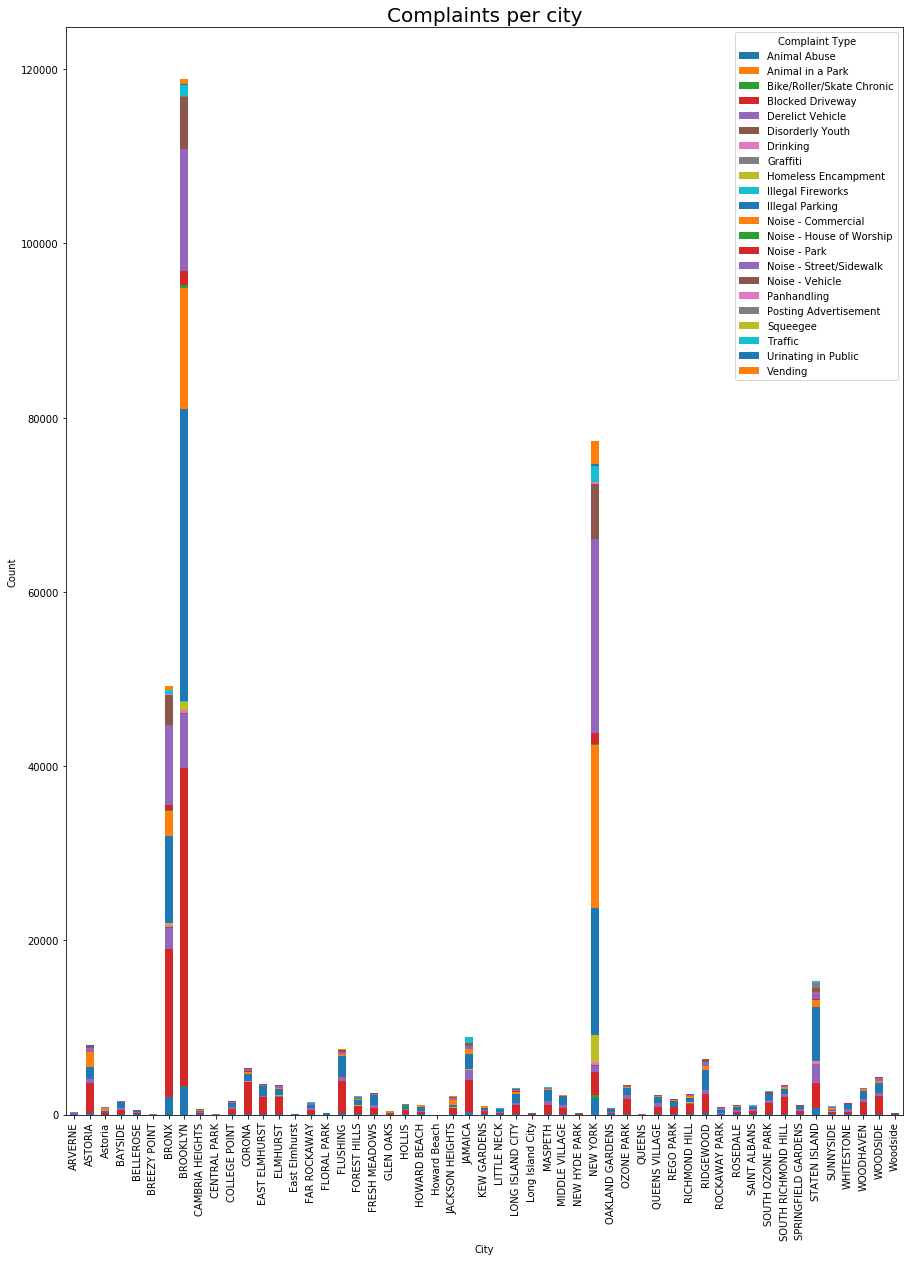

In [14]:
clarity_color_table.plot(kind="bar", figsize=(15,20),stacked=True)
plt.title('Complaints per city',fontsize=20)
plt.ylabel('Count')
plt.show()

#### Find the top 10 complaint types 

In [15]:
complaint_table = pd.DataFrame({'Count':nyc_311.groupby(['Complaint Type']).size()})
complaint_type=complaint_table.nlargest(10,columns='Count').reset_index()
complaint_type['Complaint Type']

0           Blocked Driveway
1            Illegal Parking
2    Noise - Street/Sidewalk
3         Noise - Commercial
4           Derelict Vehicle
5            Noise - Vehicle
6               Animal Abuse
7                    Traffic
8        Homeless Encampment
9                    Vending
Name: Complaint Type, dtype: object

#### Plot a bar graph of count vs. complaint types

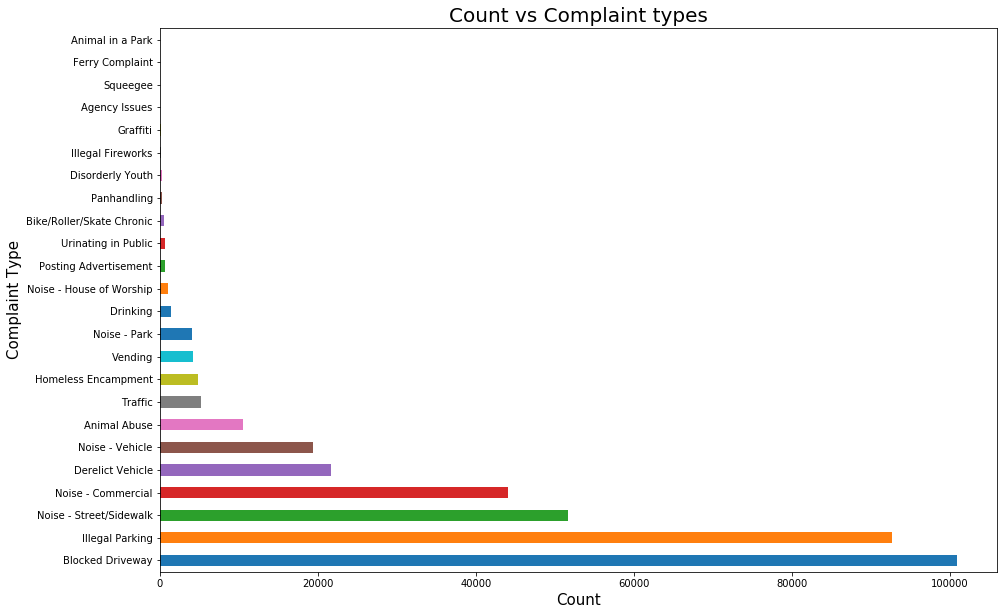

In [16]:
complaints_count = nyc_311['Complaint Type'].value_counts()
plt.figure(figsize=(15,10))
complaints_count.plot(kind='barh')
plt.title('Count vs Complaint types',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Complaint Type',fontsize=15)
plt.show()

#### Display the major complaint types and their count

In [17]:
major_complaint=nyc_311['Complaint Type'].value_counts()
major_complaint.nlargest()

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Name: Complaint Type, dtype: int64

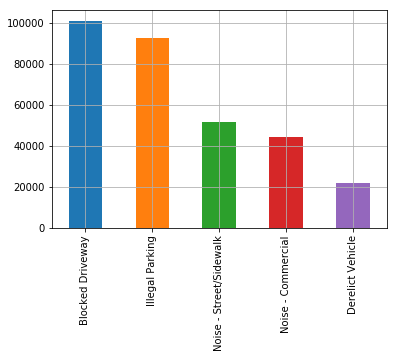

In [18]:
major_complaint.nlargest().plot(kind='bar',grid=True)
plt.show()